<font size="5" color="green" align="center"><b>Project3: Cleaning Data </b></font><br>

<font size="4" color="purple" align="center"><b>Introduction</b></font><br>

Welcome to the New York City Airbnb Data Cleaning project. In this notebook, we will clean and prepare the Airbnb dataset for New York City for 2019. This dataset provides detailed information on Airbnb listings, including host details, geographical availability, and other relevant metrics. The goal is to ensure the dataset is accurate, consistent, and ready for analysis or modeling by addressing any issues related to missing data, duplicates, and outliers.

<font size="4" color="purple" align="center"><b>Data Cleaning Process</b></font><br>

Data cleaning is a crucial step in the data analysis process. It involves detecting and correcting errors, handling missing values, and ensuring the dataset's overall integrity. By cleaning the data, we aim to:

Ensure the accuracy, consistency, and reliability of the dataset.
Handle missing values appropriately to avoid biases in analysis.
Identify and remove duplicate records to maintain data uniqueness.
Standardize the formatting of data to ensure uniformity.
Detect and manage outliers that could skew results.
This process is essential for obtaining reliable outcomes and is a key skill in data analysis and preparation.

<font size="4" color="purple" align="center"><b>About the Dataset</b></font><br>

The dataset used in this project is the New York City Airbnb Open Data for 2019. Since 2008, Airbnb has transformed the way people travel, offering unique and personalized experiences worldwide. This dataset captures the listing activity and metrics for Airbnb in New York City, providing essential information for predicting trends, understanding host behavior, and analyzing geographical availability. The dataset includes fields such as host_id, host_name, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, and availability_365.

<b>Key Concepts and Challenges</b>

* Data Integrity: Ensuring the accuracy, consistency, and reliability of data throughout the cleaning process.
* Missing Data Handling: Dealing with missing values by either imputing them or making informed decisions on how to handle gaps in the dataset.
* Duplicate Removal: Identifying and eliminating duplicate records to maintain data uniqueness.
* Standardization: Ensuring consistent formatting and units across the dataset for accurate analysis.
* Outlier Detection: Identifying and addressing outliers that may skew analysis or model performance.

Through this project, we will clean the dataset and prepare it for more advanced analysis, ensuring that it is ready for modeling and insights generation.

<b>IMPORTING REQUIRED LIBRARY</b>

In [39]:
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating plots and charts
import seaborn as sns  # For statistical data visualization

<font size="4" color="darkblue" align="center"><b>1. Understanding the Dataset</b></font><b></b>

In [40]:
# Read CSV file into a DataFrame
df = pd.read_csv("AB_NYC_2019.csv")

In [41]:
df.head() # Show first 5 records of data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [42]:
# Last five rows of the dataset
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [43]:
# Show the dimensions of the DataFrame
df.shape

(48895, 16)

In [44]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

<font size="4" color="darkblue" align="center"><b>2. Exploratory Data Analysis (EDA)</b></font>

* Check data types, missing values, and summary statistics.
* Visualize distributions to identify anomalies.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [46]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [47]:
# Check for unique identifiers
print(df['host_id'].nunique(), df.shape[0])  # host_id should be unique for each listing
print(df['id'].nunique(), df.shape[0])  # id should be unique for each record

37457 48895
48895 48895


<font size="3" color="black" align="center"><b>1. Examining the Impact of Monthly Reviews on Rental Prices</b></font>

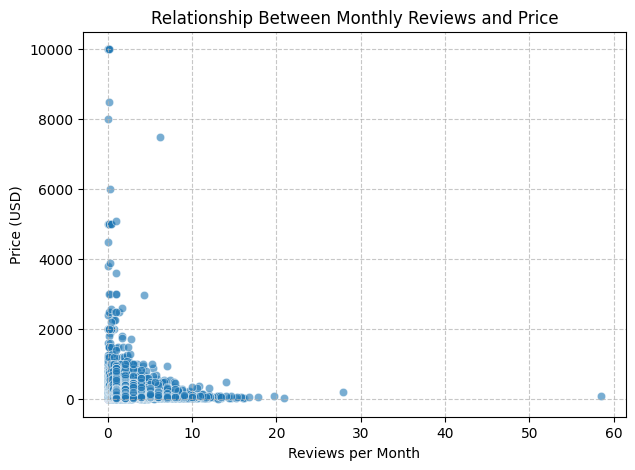

Correlation coefficient between reviews per month and price: -0.03


In [48]:
# Drop rows with missing values in 'reviews_per_month' or 'price'
df_clean = df.dropna(subset=['reviews_per_month', 'price'])

# Plot the relationship between reviews_per_month and price
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_clean, x='reviews_per_month', y='price', alpha=0.6, palette='viridis')

# Customize the appearance
plt.title('Relationship Between Monthly Reviews and Price')
plt.xlabel('Reviews per Month')
plt.ylabel('Price (USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Calculate the correlation coefficient
correlation = df_clean['reviews_per_month'].corr(df_clean['price'])
print(f'Correlation coefficient between reviews per month and price: {correlation:.2f}')

<b>Key Insight:</b>

The analysis reveals a negligible correlation between product price and the volume of customer reviews. This suggests that factors beyond pricing, such as product quality, marketing effectiveness, or overall customer satisfaction, are more influential in determining the number of reviews a product receives.

<font size="3" color="black" align="center"><b>2. Find the Price Distribution by Room Type</b></font>

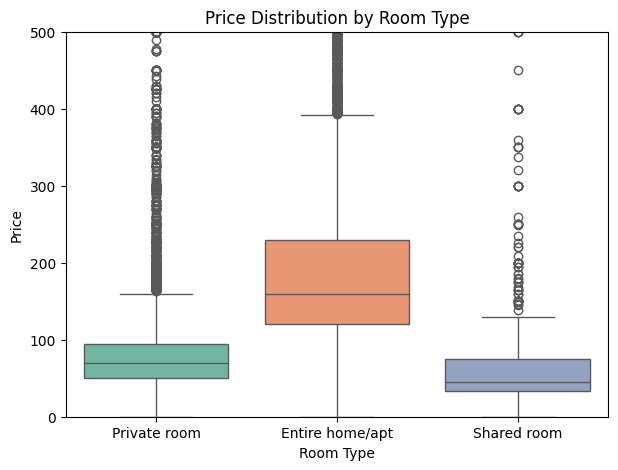

In [49]:
# Box plot of Price by Room Type
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='room_type', y='price', palette='Set2')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.ylim(0, 500)
plt.show()

<b>Key Insight:</b>

Entire home/apt rentals command significantly higher prices compared to private rooms and shared rooms. This is evident in the median price and the overall distribution of the box plots. While private rooms offer a more affordable option, shared rooms present the most budget-friendly choice.

<font size="3" color="black" align="center"><b>3. Determine the Average Price per Night for Different Room Types on Airbnb</b></font>

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64


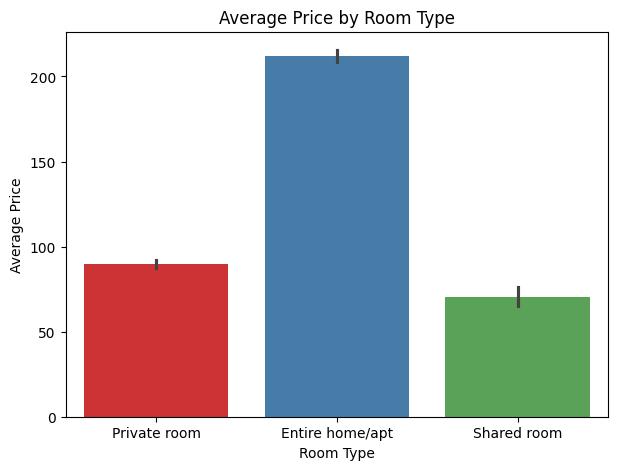

In [50]:
# Calculate average price for each room type
average_prices = df.groupby('room_type')['price'].mean()
print(average_prices)

# Average Price by Room Type
plt.figure(figsize=(7, 5))
sns.barplot(data=df, x='room_type', y='price', estimator='mean', palette='Set1')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

<b>Key Insight:</b>

Entire home/apt rentals command significantly higher average prices compared to private rooms and shared rooms.

<font size="3" color="black" align="center"><b>4. How are AirBNB rentals distributed among the five boroughs of New York?</b></font>

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64


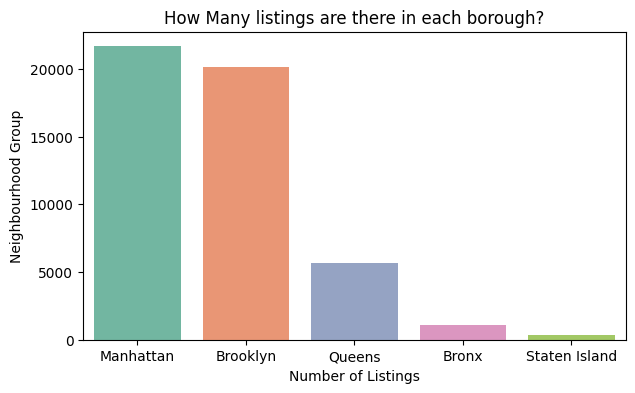

In [51]:
# Create a bar plot using seaborn
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='neighbourhood_group', palette='Set2', order=df['neighbourhood_group'].value_counts().index)

# Customize the appearance
plt.title('How Many listings are there in each borough?')
plt.xlabel('Number of Listings')
plt.ylabel('Neighbourhood Group')
plt.grid(False)

# Print the count of listings for each neighbourhood group
print(df['neighbourhood_group'].value_counts())

plt.show()

This bar chart displays the number of Airbnb listings in each borough. From the chart, it is clear that out of the five boroughs, Manhattan has the highest number of listings, followed by Brooklyn with the second highest count. Conversely, Staten Island has the fewest listings, with the Bronx coming in as the second lowest in terms of the number of listings.

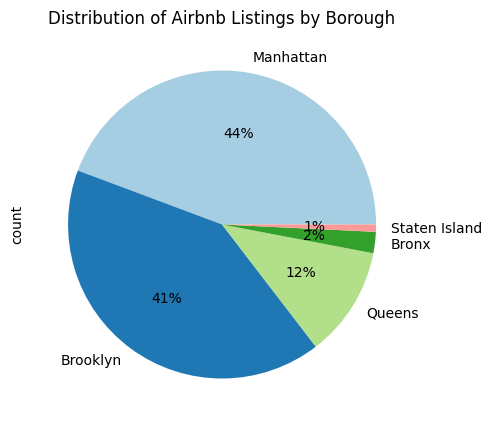

In [52]:
# Get the count of listings by neighbourhood_group
listings = df['neighbourhood_group'].value_counts()

# Plot a pie chart
plt.figure(figsize=(5, 5))  # Set the figure size
listings.plot.pie(autopct='%1.0f%%', colors=plt.cm.Paired(range(len(listings))))
plt.title('Distribution of Airbnb Listings by Borough')
plt.show()

This pie chart shows Airbnb listings by NYC borough. Manhattan leads with 44% of the total listings, while Staten Island has only 1%. Together, Manhattan and Brooklyn make up 85% of the dataset, highlighting a strong concentration of listings in these two boroughs.

<font size="3" color="black" align="center"><b>5. Identifying the Most Popular Locations for Renting an "Entire Home/Apartment"</b></font>

        Neighbourhood  Number of Listings
0        Williamsburg                1891
1  Bedford-Stuyvesant                1591
2     Upper East Side                1310
3     Upper West Side                1256
4      Hell's Kitchen                1187


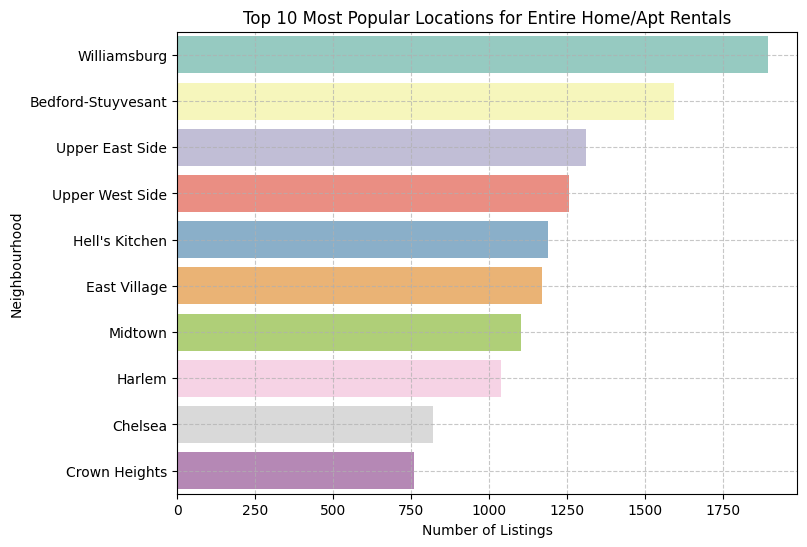

In [53]:
# Filter for "Entire home/apt" listings
entire_home_df = df[df['room_type'] == 'Entire home/apt']

# Count the number of listings in each neighbourhood
location_counts = entire_home_df['neighbourhood'].value_counts()

# Convert to DataFrame for easier plotting
location_counts_df = location_counts.reset_index()
location_counts_df.columns = ['Neighbourhood', 'Number of Listings']

print(location_counts_df.head()) # Print the most popular locations

# Plot the most popular locations
plt.figure(figsize=(8, 6))
sns.barplot(data=location_counts_df.head(10), x='Number of Listings', y='Neighbourhood', palette='Set3')
plt.title('Top 10 Most Popular Locations for Entire Home/Apt Rentals')
plt.xlabel('Number of Listings')
plt.ylabel('Neighbourhood')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<b>Insight: </b>
* Williamsburg is the clear leader in terms of entire home/apartment rentals, with a significantly higher number of listings compared to other neighborhoods.
* There's a substantial drop in listings after Williamsburg, suggesting a high demand for rentals in this area.
* The data indicates potential opportunities for landlords and property managers to focus on Williamsburg for maximizing rental income.

<font size="3" color="black" align="center"><b>6. What is the distribution of reviews per month across the listings?</b></font>

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64


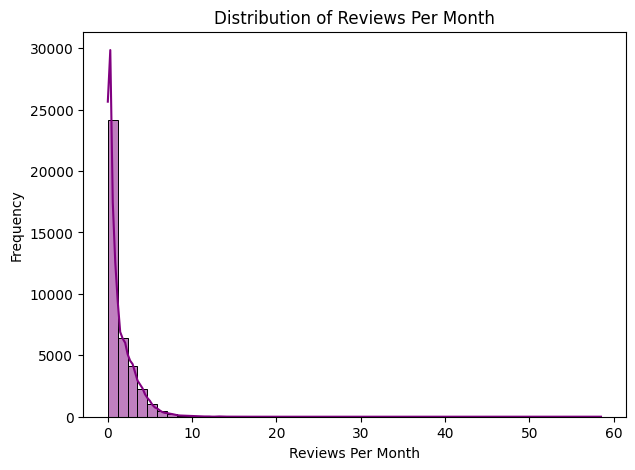

In [54]:
#Reviews Per Month Distribution
plt.figure(figsize=(7, 5))
sns.histplot(df['reviews_per_month'].dropna(), bins=50, kde=True, color='purple')
plt.title('Distribution of Reviews Per Month')
plt.xlabel('Reviews Per Month')
plt.ylabel('Frequency')

# Print descriptive statistics of reviews per month
print(df['reviews_per_month'].describe())

plt.show()

<b>Key Insights:</b>

Most listings receive few reviews per month, with a long tail of properties garnering significantly more. The data is right-skewed, indicating that a small number of highly reviewed properties inflate the average.

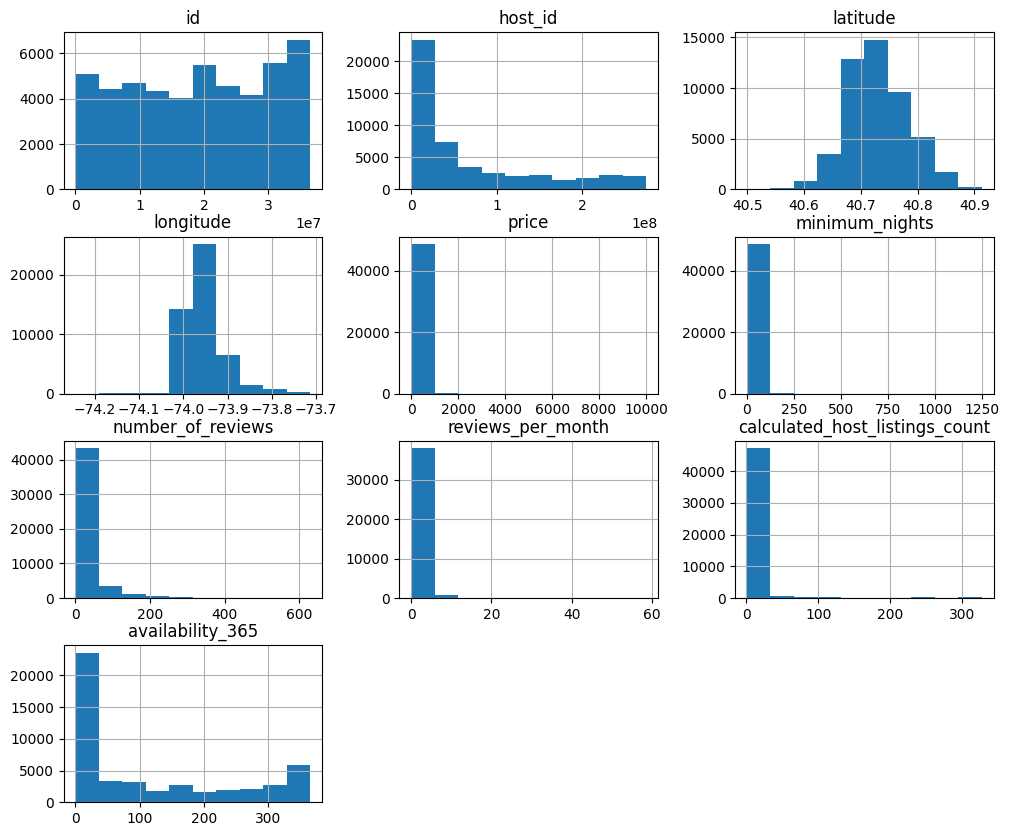

In [55]:
df.hist(figsize=(12, 10))
plt.show()

Most listings are priced low, but there are very expensive ones (outliers). Prices vary widely by property type and location. Understanding this can help hosts price competitively and identify market segments.

<font size="4" color="darkblue" align="center"><b>3. Data Cleaning</b></font><b></b>

a. Data Integrity

In [56]:
# Convert columns to correct data types
df['last_review'] = pd.to_datetime(df['last_review'])

# Verify data types
print(df.dtypes)

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object


<b> Check the missing vlaue</b>

In [57]:
# Check for missing values
print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


<b> Check the duplicates</b>

In [58]:
# Check for duplicates
print(df.duplicated().sum())

0


The dataset not have any dupiccate recored

<b> Remove unwanted column for better result </b>


In [59]:
columns_to_drop = ['id', 'host_id','name', 'host_name']

# Drop the columns
df= df.drop(columns=columns_to_drop)

# Display the remaining columns
print("Remaining columns after dropping unwanted features:")
print(df.columns)

Remaining columns after dropping unwanted features:
Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


* Columns like id, host_id, name, and host are identifiers or metadata that don't contribute to analysis. Ther are Irrelevance


<b>3.2 Missing Data Handling</b>

These columns have a significant number of missing values (10,052). The missing values might indicate that the listing has never been reviewed. You can handle these columns by imputing the missing values with logical defaults:

* last_review: Set to a default date or leave as NaT (Not a Time) if it indicates no reviews.
* reviews_per_month: Set to 0 for listings with no reviews.

In [60]:
# Impute missing values
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Handle missing values in 'last_review'
df['last_review'] = df['last_review'].fillna(pd.to_datetime('1970-01-01'))

# Verify that missing values have been handled
print(df.isnull().sum())

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


Result:

After executing the above code, the missing values in name, host_name, last_review, and reviews_per_month should be handled. The df.isnull().sum() should now return 0 for all columns, indicating that there are no more missing values.

This approach ensures that the dataset is clean and ready for further analysis or modeling.

<b> Handline Duplicate rows</b>

Identify and drop duplicate rows

df = df.drop_duplicates()

Verify that duplicates have been removed

print(df.duplicated().sum())


<b>3.3. Standardizating Data<b>

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   neighbourhood_group             48895 non-null  object        
 1   neighbourhood                   48895 non-null  object        
 2   latitude                        48895 non-null  float64       
 3   longitude                       48895 non-null  float64       
 4   room_type                       48895 non-null  object        
 5   price                           48895 non-null  int64         
 6   minimum_nights                  48895 non-null  int64         
 7   number_of_reviews               48895 non-null  int64         
 8   last_review                     48895 non-null  datetime64[ns]
 9   reviews_per_month               48895 non-null  float64       
 10  calculated_host_listings_count  48895 non-null  int64         
 11  av

In [62]:
# Verify standardization
print(df[['neighbourhood', 'room_type']].head())

  neighbourhood        room_type
0    Kensington     Private room
1       Midtown  Entire home/apt
2        Harlem     Private room
3  Clinton Hill  Entire home/apt
4   East Harlem  Entire home/apt


In [63]:
# Standardize categorical variables
df['neighbourhood'] = df['neighbourhood'].str.lower().str.strip()
df['room_type'] = df['room_type'].str.lower().str.strip()

# Ensure consistent units (e.g., prices in USD)
# Assuming all prices are in USD, no further action needed here

# Verify standardization
print(df[['neighbourhood', 'room_type']].head())

  neighbourhood        room_type
0    kensington     private room
1       midtown  entire home/apt
2        harlem     private room
3  clinton hill  entire home/apt
4   east harlem  entire home/apt


<font size="4" color="darkblue" align="center"><b>4. Handling Outliers</b></font>

Number of outliers: 45923
Number of outliers removed: 2972


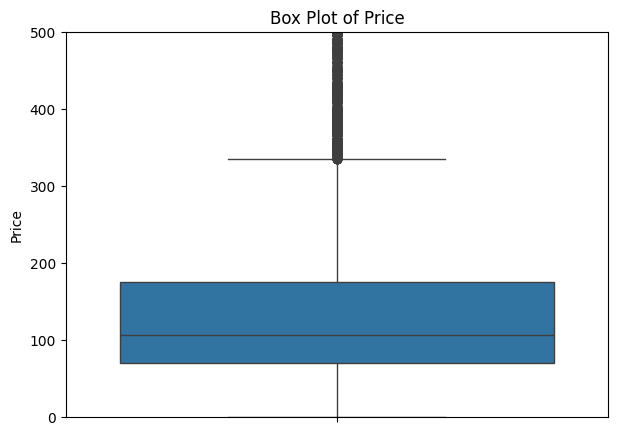

In [64]:
# Outlier detection using IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
print(f"Number of outliers: {df_no_outliers.shape[0]}")
print(f"Number of outliers removed: {df.shape[0] - df_no_outliers.shape[0]}")

# Create a box plot
plt.figure(figsize=(7, 5))
sns.boxplot(y=df['price'])
plt.title('Box Plot of Price')
plt.ylabel('Price')
plt.ylim(0, 500)
plt.show()


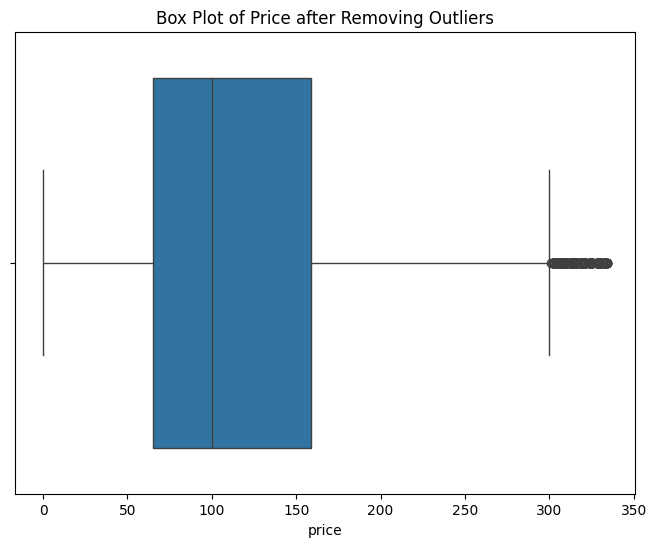

In [65]:
# Filter out the outliers
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
plt.figure(figsize=(8,6))
sns.boxplot(x=df_filtered['price'])
plt.title('Box Plot of Price after Removing Outliers')
plt.show()

<font size="4" color="darkblue" align="center"><b>5.Feature Engineering</b></font>

5.1. Create New Features

In [ ]:
# Example: Create a 'log_price' feature
df['log_price'] = np.log1p(df['price'])

5.2 Encode Categorical Variables



In [66]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'], drop_first=True)
df.head()


,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_private room,room_type_shared room
0,kensington,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,True,False,False,False,True,False
1,midtown,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,False,True,False,False,False,False
2,harlem,40.80902,-73.94190,150,3,0,1970-01-01,0.00,1,365,False,True,False,False,True,False
3,clinton hill,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194,True,False,False,False,False,False
4,east harlem,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,False,True,False,False,False,False


<font size="4" color="darkblue" align="center"><b>6. Final Validation</b></font>

In [68]:
# Check the cleaned data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   neighbourhood                      48895 non-null  object        
 1   latitude                           48895 non-null  float64       
 2   longitude                          48895 non-null  float64       
 3   price                              48895 non-null  int64         
 4   minimum_nights                     48895 non-null  int64         
 5   number_of_reviews                  48895 non-null  int64         
 6   last_review                        48895 non-null  datetime64[ns]
 7   reviews_per_month                  48895 non-null  float64       
 8   calculated_host_listings_count     48895 non-null  int64         
 9   availability_365                   48895 non-null  int64         
 10  neighbourhood_group_Brooklyn      

Apply ML Algorthim

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [70]:
# Separate the target variable (price) and features
X = df.drop(['price', 'neighbourhood'], axis=1)  # Drop 'neighbourhood' as well since it's an object and already encoded
y = df['price']

In [71]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
# Drop 'last_review' column from features before scaling
X_train_numeric = X_train.drop(columns=['last_review'])
X_test_numeric = X_test.drop(columns=['last_review'])

# Fit the scaler on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

In [73]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [74]:
# Calculate MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 38885.049155693254
R-squared (R²): 0.12100818229695798


In [75]:
# Ensure that X_train_numeric.columns matches with the columns used in the model
print(len(X_train_numeric.columns))
print(len(model.coef_))


13
13


In [76]:
# Get the feature names from the training data that was used in model fitting
features = X_train_numeric.columns

# Create a DataFrame with the correct feature names and corresponding coefficients
coefficients = pd.DataFrame({"Feature": features, "Coefficient": model.coef_})
print(coefficients)


                              Feature  Coefficient
0                            latitude   -11.806647
1                           longitude   -23.700802
2                      minimum_nights    -0.722912
3                   number_of_reviews   -11.041683
4                   reviews_per_month    -5.479465
5      calculated_host_listings_count    -6.285601
6                    availability_365    26.371846
7        neighbourhood_group_Brooklyn   -17.730813
8       neighbourhood_group_Manhattan    13.675821
9          neighbourhood_group_Queens    -1.635299
10  neighbourhood_group_Staten Island   -13.523024
11             room_type_private room   -52.297499
12              room_type_shared room   -21.610026


In [77]:
# Fit the model again to ensure everything is consistent
model.fit(X_train_numeric, y_train)

# Create DataFrame of coefficients
coefficients = pd.DataFrame({"Feature": X_train_numeric.columns, "Coefficient": model.coef_})
print(coefficients)


                              Feature  Coefficient
0                            latitude  -216.418232
1                           longitude  -514.917848
2                      minimum_nights    -0.033667
3                   number_of_reviews    -0.248135
4                   reviews_per_month    -3.415638
5      calculated_host_listings_count    -0.189484
6                    availability_365     0.200022
7        neighbourhood_group_Brooklyn   -36.030597
8       neighbourhood_group_Manhattan    27.522835
9          neighbourhood_group_Queens    -5.134099
10  neighbourhood_group_Staten Island  -156.572555
11             room_type_private room  -105.011887
12              room_type_shared room  -142.671537


7. Summary and Insights

In [78]:
# Summary of findings
print("Summary of Key Insights:")
print(f"- The average price of listings varies significantly by room type, with entire homes/apartments generally being more expensive than private or shared rooms.")
print(f"- The distribution of listings is heavily concentrated in certain boroughs, with Manhattan and Brooklyn having the highest number of listings.")
print(f"- The number of reviews varies by neighborhood group, which could be influenced by factors like popularity or the number of listings in the area.")


Summary of Key Insights:
- The average price of listings varies significantly by room type, with entire homes/apartments generally being more expensive than private or shared rooms.
- The distribution of listings is heavily concentrated in certain boroughs, with Manhattan and Brooklyn having the highest number of listings.
- The number of reviews varies by neighborhood group, which could be influenced by factors like popularity or the number of listings in the area.


<font size="4" color="darkblue" align="center"><b>Conclusion:</b></font>

Target Audience Preferences: The data suggests that Airbnb users might prefer shared or private rooms over entire homes, likely due to cost considerations.
Location Matters: Areas in the east (perhaps in Queens or Brooklyn) are seeing more activity, which could be due to a variety of factors such as affordability or local attractions.

Pricing Strategy: Higher prices, when adjusted for logarithmic effects, appear to correlate with increased activity, possibly reflecting higher quality listings.

Neighborhood Variability: Manhattan's lower coefficient might reflect market saturation or higher prices, while areas like Staten Island show relative gains, indicating potential opportunities for hosts in less saturated markets.